In [1]:
!pip install tiingo
!pip install tiingo[pandas]

In [210]:
!pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
Processing c:\users\yukti\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl


In [13]:
# Importing necessary libraries 
import os
import json
import pandas as pd
import numpy as np
import glob
from IPython import get_ipython


# For data cleaning and visualization
import pandas as pd
import numpy as np
from numpy import array
from datetime import date
from datetime import datetime, timedelta
import pandas_datareader.data as web


# For saving the model
import pickle

# For model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import math

import re
import nltk
from nltk.corpus import stopwords

In [212]:
import matplotlib.pyplot as plt
from pylab import rcParams 
import plotly.express as px
import plotly.graph_objects as go
import plotly
import plotly.offline as offline
pd.options.plotting.backend = "plotly"

In [4]:
df = pd.read_csv("title_cleaned_news_dataset.csv", index_col=0)
df

,headline,date
0,Nikkei down 1 4 pct on economy fears autos drop,2008-10-02
1,FOREX Dollar poised for biggest weekly gain in...,2008-10-03
2,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,2008-10-03
3,GLOBAL MARKETS Stocks hold up after Wells Wach...,2008-10-03
4,GLOBAL MARKETS U S bailout plan passes inves...,2008-10-03
...,...,...
221508,Cisco Offers Gloomy Outlook on Revenue Earnin...,2020-02-13
221509,NFL notebook QB Newton s future depends on he...,2020-02-13
221510,Comerica taps Wells Fargo exec to head wealth ...,2020-02-13
221511,Wells Fargo ends forced arbitration for sexual...,2020-02-13


In [5]:
import nltk
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

In [7]:
# Iterate through the headlines and get the polarity scores using vader
scores = df['headline'].apply(vader.polarity_scores).tolist()
scores

[{'neg': 0.45, 'neu': 0.55, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.6597},
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5267},
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.25},
 {'neg': 0.136, 'neu': 0.583, 'pos': 0.282, 'compound': 0.3612},
 {'neg': 0.463, 'neu': 0.537, 'pos': 0.0, 'compound': -0.7845},
 {'neg': 0.421, 'neu': 0.305, 'pos': 0.274, 'compound': -0.5267},
 {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296},
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.2235},
 {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.8519},
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369},
 {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.5106},
 {'neg': 0.198, 'neu': 0.517, 'pos': 0.284, 'compound': 0.25},
 {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.7184},
 {'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound'

In [8]:
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.450,0.550,0.000,-0.5994
1,0.000,0.597,0.403,0.6597
2,0.000,0.645,0.355,0.5267
3,0.000,0.800,0.200,0.2500
4,0.136,0.583,0.282,0.3612
...,...,...,...,...
221508,0.151,0.849,0.000,-0.1531
221509,0.000,1.000,0.000,0.0000
221510,0.000,0.606,0.394,0.6369
221511,0.448,0.414,0.138,-0.6705


In [9]:
# Join the DataFrames of the news and the list of dicts
scores_df = df.join(scores_df, rsuffix='_right')
scores_df

,headline,date,neg,neu,pos,compound
0,Nikkei down 1 4 pct on economy fears autos drop,2008-10-02,0.450,0.550,0.000,-0.5994
1,FOREX Dollar poised for biggest weekly gain in...,2008-10-03,0.000,0.597,0.403,0.6597
2,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,2008-10-03,0.000,0.645,0.355,0.5267
3,GLOBAL MARKETS Stocks hold up after Wells Wach...,2008-10-03,0.000,0.800,0.200,0.2500
4,GLOBAL MARKETS U S bailout plan passes inves...,2008-10-03,0.136,0.583,0.282,0.3612
...,...,...,...,...,...,...
221508,Cisco Offers Gloomy Outlook on Revenue Earnin...,2020-02-13,0.151,0.849,0.000,-0.1531
221509,NFL notebook QB Newton s future depends on he...,2020-02-13,0.000,1.000,0.000,0.0000
221510,Comerica taps Wells Fargo exec to head wealth ...,2020-02-13,0.000,0.606,0.394,0.6369
221511,Wells Fargo ends forced arbitration for sexual...,2020-02-13,0.448,0.414,0.138,-0.6705


In [10]:
scores_df[scores_df.isnull().any(axis=1)]

,headline,date,neg,neu,pos,compound


In [11]:
scores_df = scores_df.sort_values(by=['date'], ascending=True)
scores_df

,headline,date,neg,neu,pos,compound
0,Nikkei down 1 4 pct on economy fears autos drop,2008-10-02,0.450,0.550,0.000,-0.5994
1,FOREX Dollar poised for biggest weekly gain in...,2008-10-03,0.000,0.597,0.403,0.6597
2,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,2008-10-03,0.000,0.645,0.355,0.5267
3,GLOBAL MARKETS Stocks hold up after Wells Wach...,2008-10-03,0.000,0.800,0.200,0.2500
4,GLOBAL MARKETS U S bailout plan passes inves...,2008-10-03,0.136,0.583,0.282,0.3612
...,...,...,...,...,...,...
221487,Why T Mobile s deal with Sprint could be the w...,2020-02-13,0.000,0.881,0.119,0.2263
221488,6 Low Price to Book Stocks With Great Growth P...,2020-02-13,0.131,0.313,0.556,0.7783
221489,Cisco Systems CSCO Q2 Earnings And Revenues ...,2020-02-13,0.000,1.000,0.000,0.0000
221480,Improve Your Retirement Income With These 3 To...,2020-02-13,0.000,0.701,0.299,0.5719


In [194]:
plot_scores = scores_df.drop(columns = ['headline'], inplace=False)
plot_scores

,date,neg,neu,pos,compound
0,2008-10-02,0.450,0.550,0.000,-0.5994
1,2008-10-03,0.000,0.597,0.403,0.6597
2,2008-10-03,0.000,0.645,0.355,0.5267
3,2008-10-03,0.000,0.800,0.200,0.2500
4,2008-10-03,0.136,0.583,0.282,0.3612
...,...,...,...,...,...
221487,2020-02-13,0.000,0.881,0.119,0.2263
221488,2020-02-13,0.131,0.313,0.556,0.7783
221489,2020-02-13,0.000,1.000,0.000,0.0000
221480,2020-02-13,0.000,0.701,0.299,0.5719


In [195]:
plot_scores['date'] = pd.to_datetime(plot_scores['date'])
plot_scores

,date,neg,neu,pos,compound
0,2008-10-02,0.450,0.550,0.000,-0.5994
1,2008-10-03,0.000,0.597,0.403,0.6597
2,2008-10-03,0.000,0.645,0.355,0.5267
3,2008-10-03,0.000,0.800,0.200,0.2500
4,2008-10-03,0.136,0.583,0.282,0.3612
...,...,...,...,...,...
221487,2020-02-13,0.000,0.881,0.119,0.2263
221488,2020-02-13,0.131,0.313,0.556,0.7783
221489,2020-02-13,0.000,1.000,0.000,0.0000
221480,2020-02-13,0.000,0.701,0.299,0.5719


In [84]:
#ps = plot_scores.loc[plot_scores['date'] > '200-02-10']
#ps

,date,neg,neu,pos,compound
221407,2020-02-11,0.000,0.521,0.479,0.5574
221406,2020-02-11,0.000,0.816,0.184,0.2023
221405,2020-02-11,0.000,0.769,0.231,0.4019
221404,2020-02-11,0.000,1.000,0.000,0.0000
221403,2020-02-11,0.000,0.870,0.130,0.1280
...,...,...,...,...,...
221487,2020-02-13,0.000,0.881,0.119,0.2263
221488,2020-02-13,0.131,0.313,0.556,0.7783
221489,2020-02-13,0.000,1.000,0.000,0.0000
221480,2020-02-13,0.000,0.701,0.299,0.5719


In [196]:
ms = plot_scores.groupby(['date']).agg(['mean'])
ms['date'] = ms.index
ms = ms.reset_index(drop=True)
ms

,neg,neu,pos,compound,date
,mean,mean,mean,mean,
0,0.450000,0.550000,0.000000,-0.599400,2008-10-02
1,0.034000,0.656250,0.310000,0.449400,2008-10-03
2,0.442000,0.421000,0.137000,-0.655600,2008-10-06
3,0.277500,0.722500,0.000000,-0.460450,2008-10-07
4,0.000000,0.827000,0.173000,0.223500,2008-10-08
...,...,...,...,...,...
3636,0.047345,0.858259,0.094414,0.074910,2020-02-09
3637,0.044795,0.851521,0.103671,0.097086,2020-02-10
3638,0.085824,0.815216,0.098959,0.005268,2020-02-11


In [202]:
ms2 = ms.loc[ms['date']>'2019-09-01']
ms2 = ms2.reset_index(drop=True)
ms2

,neg,neu,pos,compound,date
,mean,mean,mean,mean,
0,0.071095,0.830124,0.098752,0.032472,2019-09-02
1,0.066426,0.795725,0.137848,0.099319,2019-09-03
2,0.061790,0.830305,0.107895,0.072453,2019-09-04
3,0.041561,0.838123,0.120316,0.111776,2019-09-05
4,0.073264,0.817357,0.109380,0.045080,2019-09-06
...,...,...,...,...,...
160,0.047345,0.858259,0.094414,0.074910,2020-02-09
161,0.044795,0.851521,0.103671,0.097086,2020-02-10
162,0.085824,0.815216,0.098959,0.005268,2020-02-11


In [222]:
ms3 = pd.DataFrame()
ms3['date'] = ms2['date']
ms3['pos'] = ms2['pos']['mean']
ms3['neg'] = ms2['neg']['mean']
ms3['neu'] = ms2['neu']['mean']
ms3['compound'] = ms2['compound']['mean']

ms3

,date,pos,neg,neu,compound
0,2019-09-02,0.098752,0.071095,0.830124,0.032472
1,2019-09-03,0.137848,0.066426,0.795725,0.099319
2,2019-09-04,0.107895,0.061790,0.830305,0.072453
3,2019-09-05,0.120316,0.041561,0.838123,0.111776
4,2019-09-06,0.109380,0.073264,0.817357,0.045080
...,...,...,...,...,...
160,2020-02-09,0.094414,0.047345,0.858259,0.074910
161,2020-02-10,0.103671,0.044795,0.851521,0.097086
162,2020-02-11,0.098959,0.085824,0.815216,0.005268
163,2020-02-12,0.106659,0.075136,0.818205,0.041805


In [247]:
fig = ms3.plot(x='date',y=['pos','neg','neu','compound'],title='VADAR Scores',template='plotly_dark', kind='line')
fig.update_yaxes(title_text='Scores')
fig.update_xaxes(title_text='Date')
fig

In [248]:
fig1 = ms3.plot(x='date',y=['pos','neg','neu','compound'],title='VADAR Scores', kind='line')
fig1.update_yaxes(title_text='Scores')
fig1.update_xaxes(title_text='Date')
fig1

In [242]:
import plotly.express as px
fig = px.bar(ms3, x='date', y=['pos','neg','neu','compound'],
    labels=dict(x="date", y="Score"), title='VADAR Scores',template='plotly_dark'
)
fig.show()

In [203]:
pos = ms2['pos']['mean'].tolist()
neg = ms2['neg']['mean'].tolist()
neu = ms2['neu']['mean'].tolist()
comp = ms2['compound']['mean'].tolist()
dates = ms2['date'].tolist()

In [215]:
import plotly.offline as offline
pd.options.plotting.backend = "plotly"

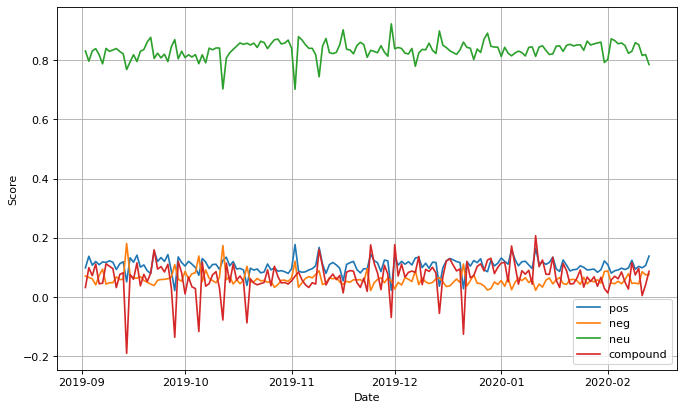

In [218]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(dates, pos, label='pos')
plt.plot(dates,neg, label='neg')
plt.plot(dates, neu, label='neu')
plt.plot(dates, comp, label='compound')
plt.xlabel('Date')
plt.ylabel('Score')
plt.grid()
plt.legend()